# KNN算法 

本节代码来自: **黄海广-机器学习** https://github.com/fengdu78/WZU-machine-learning-course 推荐自学  
   


## 1.1 距离度量
在机器学习算法中，我们经常需要计算样本之间的相似度，通常的做法是计算样本之间的距离。

设$x$和$y$为两个向量，求它们之间的距离。


In [1]:
import numpy as np  #注意：运行代码时候需要导入NumPy库。

### 欧氏距离(Euclidean distance)

欧几里得度量(euclidean metric)(也称欧氏距离)是一个通常采用的距离定义，指在$m$维空间中两个点之间的真实距离，或者向量的自然长度(即该点到原点的距离)。在二维和三维空间中的欧氏距离就是两点之间的实际距离。

距离公式：

$$
d\left( x,y \right) = \sqrt{\sum_{i}^{}(x_{i} - y_{i})^{2}}
$$

In [2]:
def euclidean(x, y):

    return np.sqrt(np.sum((x - y)**2))

In [3]:
x = np.asarray([1,3,2,4])
y = np.asarray([2,5,3,1])
euclidean(x,y)

3.872983346207417

### 曼哈顿距离(Manhattan distance)

曼哈顿距离也称为城市街区距离(City Block distance)。 

距离公式：

$$
d(x,y) = \sum_{i}^{}|x_{i} - y_{i}|
$$

In [4]:
def manhattan(x, y):

    return np.sum(np.abs(x - y))

In [5]:
x = np.asarray([1,3,2,4])
y = np.asarray([2,5,3,1])
manhattan(x,y)

7

### 切比雪夫距离(Chebyshev distance)

二个点之间的距离定义是其各坐标数值差绝对值的最大值。

距离公式：
$$
d\left( x,y \right) = \max_{i}\left| x_{i} - y_{i} \right|
$$

In [6]:
def chebyshev(x, y):

    return np.max(np.abs(x - y))

In [7]:
x = np.asarray([1,3,2,4])
y = np.asarray([2,5,3,1])
chebyshev(x,y)

3

### 闵可夫斯基距离(Minkowski distance)

$p$取1或2时的闵氏距离是最为常用的，$p= 2$即为欧氏距离，而$p =1$时则为曼哈顿距离。

当$p$取无穷时的极限情况下，可以得到切比雪夫距离。

距离公式：

$$
d\left( x,y \right) = \left( \sum_{i}^{}|x_{i} - y_{i}|^{p} \right)^{\frac{1}{p}}
$$

In [8]:
def minkowski(x, y, p):

    return np.sum(np.abs(x - y)**p)**(1 / p)

In [9]:
x = np.asarray([1,3,2,4])
y = np.asarray([2,5,3,1])
minkowski(x,y,p=1)

7.0

### 余弦相似度(Cosine Similarity)

余弦相似性通过测量两个向量的夹角的余弦值来度量它们之间的相似性。 


$$
\cos\left( \theta \right) = \frac{A \cdot B}{\parallel A \parallel \parallel B \parallel} = \frac{\sum_{i = 1}^{n}A_{i} \times B_{i}}{\sqrt{\sum_{i = 1}^{n}(A_{i})^{2}} \times \sqrt{\sum_{i = 1}^{n}(B_{i})^{2}}}
$$

In [10]:
def cosine_dis(x, y):
    num = sum(map(float, x * y))
    denom = np.linalg.norm(x) * np.linalg.norm(y)
    return round(num / float(denom), 3)

In [11]:
x = np.asarray([1,3,2,4])
y = np.asarray([2,5,3,1])
cosine_dis(x,y)

0.789

## 1.2 KNN鸢尾花分类 


In [12]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split#用于模型划分
from sklearn.neighbors import KNeighborsClassifier##KNN算法包
import numpy as np

# 载入数据集
iris_dataset = load_iris()
iris_dataset
#['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

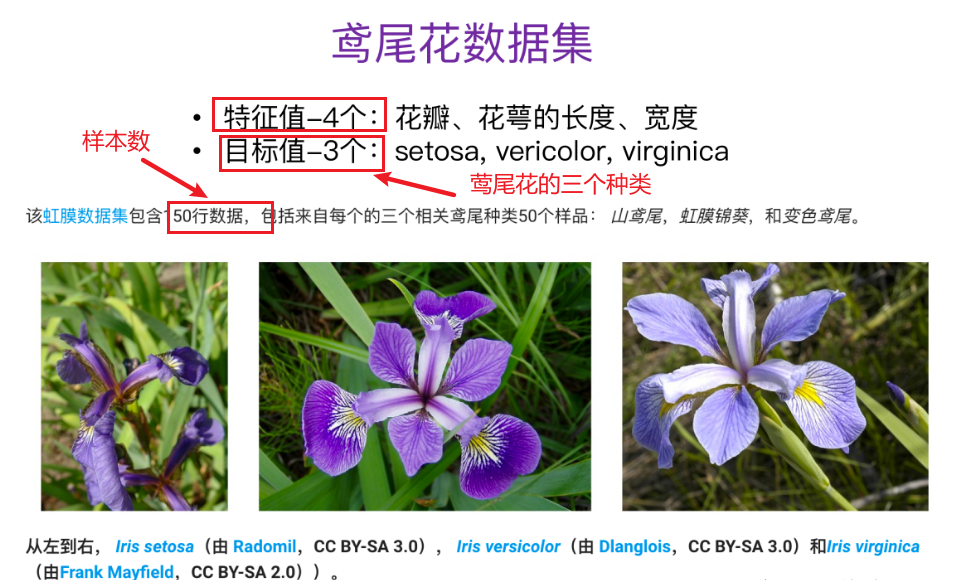

In [14]:
X = iris_dataset['data']#特征
Y = iris_dataset['target']#类别

In [15]:
# 数据划分
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#训练阶段
knn = KNeighborsClassifier(n_neighbors=5)#设置邻居数K
knn.fit(X_train, Y_train)#构建基于训练集的模型

#测试评估模型
Y_pred=knn.predict(X_test)
print("Test set score:{:.2f}".format(knn.score(X_test, Y_test)))

# 做出预测，预测花萼长5cm宽2.9cm，花瓣长1cm宽0.2cm的花型
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(X_new)
print("Prediction:{}".format(prediction))
print("Predicted target name:{}".format(iris_dataset['target_names'][prediction]))


Test set score:0.97
Prediction:[0]
Predicted target name:['setosa']


### 1.2.1 不同K值、P值的结果

In [16]:
# 不同K值的结果
knn = KNeighborsClassifier(n_neighbors=4)#设置邻居数K
knn.fit(X_train, Y_train)#构建基于训练集的模型

print("Test set score:{:.2f}".format(knn.score(X_test, Y_test)))

Test set score:1.00


In [17]:
# 不同P值的结果
knn = KNeighborsClassifier(n_neighbors=5,p=1)#设置邻居数K
knn.fit(X_train, Y_train)#构建基于训练集的模型

print("Test set score:{:.2f}".format(knn.score(X_test, Y_test)))

Test set score:1.00


当特征维度为4, 最高准率为1。

因此选择前2个特征维度：**花瓣长度、花瓣宽度**。

In [18]:
X_2 = iris_dataset['data'][:,:2]#特征
Y_2 = iris_dataset['target']#类别

In [19]:
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_2,Y_2, test_size=0.3, random_state=2023)
#训练阶段
knn = KNeighborsClassifier(n_neighbors=5)#设置邻居数K
knn.fit(X_train_2, Y_train_2)#构建基于训练集的模型

print("Test set score:{:.2f}".format(knn.score(X_test_2, Y_test_2)))

Test set score:0.82


### 1.2.2 自动调参

In [20]:
best_score = 0.0 
best_k = -1 
for k in range(1, 11):
    knn_clf = KNeighborsClassifier(n_neighbors=k) 
    knn_clf.fit(X_train_2, Y_train_2) 
    score = knn_clf.score(X_test_2, Y_test_2) 
    if score > best_score: 
        best_k = k 
        best_score = score 
            
print("best_k = " + str(best_k)) 
print("best_score = " + str(best_score))

best_k = 9
best_score = 0.8666666666666667


## 1.3 KNN手写数字分类

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)
X_3, y_3 = mnist["data"], mnist["target"]
X_train_3, X_test_3, y_train_3, y_test_3 = X_3[:60000], X_3[60000:], y_3[:60000], y_3[60000:]

In [22]:
knn = KNeighborsClassifier(n_neighbors=5)#设置邻居数K
knn.fit(X_train_3, y_train_3)#构建基于训练集的模型

#测试评估模型
print("Test set score:{:.2f}".format(knn.score(X_test_3, y_test_3)))

Test set score:0.97
